# Error analysis CTR

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay

## Load data

In [36]:
GT_INFR = "y_test_1st.csv"

CLASS = "class_"
PROB = "prob_"
SPLIT = "split_"
NO_SPLIT = "no_split_"
PRED_TEST = "predictions_test.csv"
PRED_INFR = "predictions_inference.csv"

# Inference
y_i = pd.read_csv(GT_INFR, names = ["is_click"])
display(y_i.head())

# class predictions
# train-test split
c_s_p_t = pd.read_csv(CLASS + SPLIT + PRED_TEST)
c_s_p_i = pd.read_csv(CLASS + SPLIT + PRED_INFR, names = ["is_click_predicted"])

display(c_s_p_t.head())
display(c_s_p_i.head())

# no split
c_ns_p_i= pd.read_csv(CLASS + NO_SPLIT + PRED_INFR, names = ["is_click_predicted"])
display(c_ns_p_i.head())

# probabilities predictions
# train-test split
p_s_p_t = pd.read_csv(PROB + SPLIT + PRED_TEST)
p_s_p_i = pd.read_csv(PROB + SPLIT + PRED_INFR, names = ["is_click_predicted"])

display(p_s_p_t.head())
display(p_s_p_i.head())

# no split
p_ns_p_i= pd.read_csv(PROB + NO_SPLIT + PRED_INFR, names = ["is_click_predicted"])
display(p_ns_p_i.head())

,is_click
0,0
1,0
2,0
3,0
4,0


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day,is_click_predicted
0,H,359520.0,4.0,NaN,0.0,4.0,2.0,NaN,0.0,0.0,4.0,5.0,0.0
1,C,359520.0,4.0,NaN,1.0,3.0,3.0,2.0,0.0,0.0,19.0,7.0,0.0
2,D,98970.0,4.0,NaN,1.0,3.0,3.0,3.0,1.0,0.0,15.0,7.0,1.0
3,C,405490.0,3.0,NaN,1.0,3.0,3.0,2.0,1.0,0.0,8.0,6.0,1.0
4,I,360936.0,2.0,NaN,0.0,5.0,3.0,2.0,1.0,0.0,16.0,5.0,0.0


,is_click_predicted
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


,is_click_predicted
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day,is_click_predicted
0,H,359520.0,4.0,NaN,0.0,4.0,2.0,NaN,0.0,0.0,4.0,5.0,0.438559
1,C,359520.0,4.0,NaN,1.0,3.0,3.0,2.0,0.0,0.0,19.0,7.0,0.422539
2,D,98970.0,4.0,NaN,1.0,3.0,3.0,3.0,1.0,0.0,15.0,7.0,0.578620
3,C,405490.0,3.0,NaN,1.0,3.0,3.0,2.0,1.0,0.0,8.0,6.0,0.541891
4,I,360936.0,2.0,NaN,0.0,5.0,3.0,2.0,1.0,0.0,16.0,5.0,0.395593


,is_click_predicted
0,0.498124
1,0.671820
2,0.497924
3,0.581145
4,0.472333


,is_click_predicted
0,0.479188
1,0.672355
2,0.495231
3,0.569352
4,0.441821


In [37]:
thr = 0.5

print(f"f1 class test train-test split: {f1_score(c_s_p_t.is_click, c_s_p_t.is_click_predicted)}")
print(f"f1 class inference train-test split: {f1_score(y_i.iloc[:, 0], c_s_p_i.iloc[:, 0])}")
print(f"f1 class inference no split: {f1_score(y_i.iloc[:, 0], c_ns_p_i.iloc[:, 0])}")
print()
print(f"f1 prob test train-test split: {f1_score(p_s_p_t.is_click, p_s_p_t.is_click_predicted > thr)}")
print(f"f1 prob inference train-test split: {f1_score(y_i.iloc[:, 0], p_s_p_i.iloc[:, 0] > thr)}")
print(f"f1 prob inference no split: {f1_score(y_i.iloc[:, 0], p_ns_p_i.iloc[:, 0] > thr)}")

f1 class test train-test split: 0.1492720683088642
f1 class inference train-test split: 0.15270790174607873
f1 class inference no split: 0.15470152898305722

f1 prob test train-test split: 0.1492720683088642
f1 prob inference train-test split: 0.15270790174607873
f1 prob inference no split: 0.15470152898305722


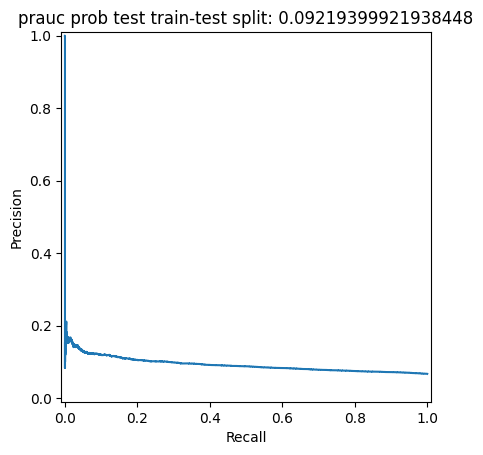

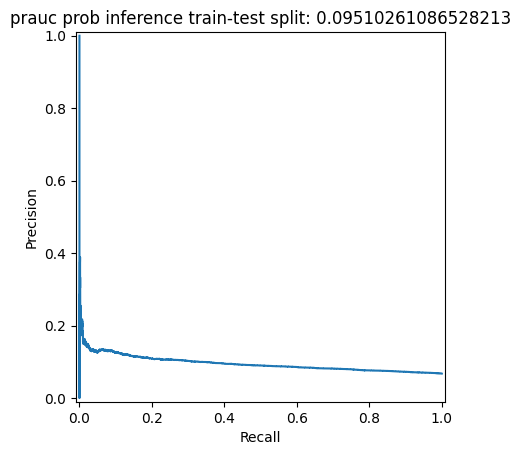

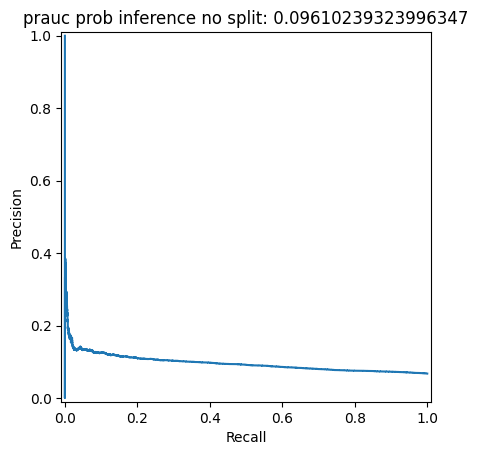

In [38]:
y_trues = [p_s_p_t.is_click, y_i.is_click, y_i.is_click]
y_scores = [p_s_p_t.is_click_predicted, p_s_p_i.is_click_predicted, p_ns_p_i.is_click_predicted]
results_labels = ["prob test train-test split",
                  "prob inference train-test split",
                  "prob inference no split"]

for y_true, y_score, label in zip(y_trues, y_scores, results_labels):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title(f"prauc {label}: {pr_auc}")
    plt.show()
    print()

## Error analysis probabilities

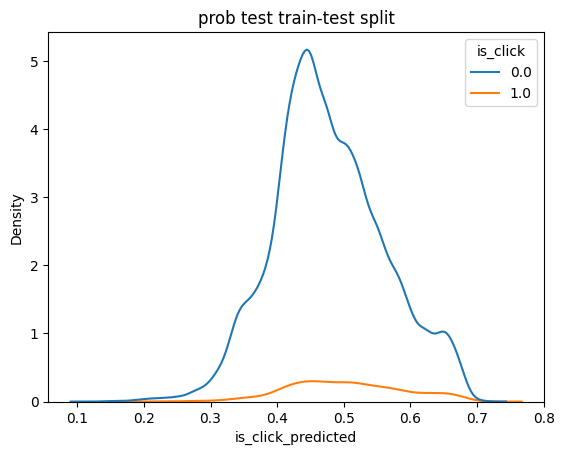

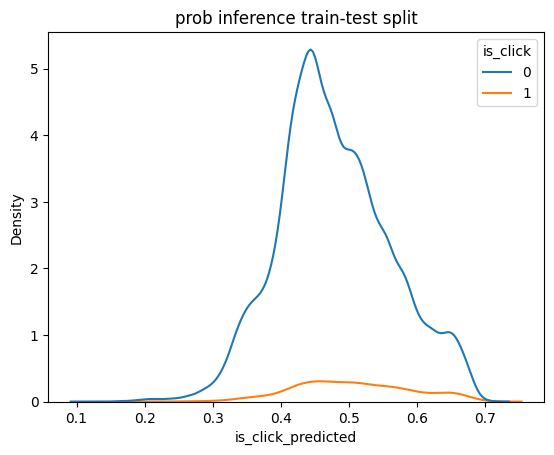

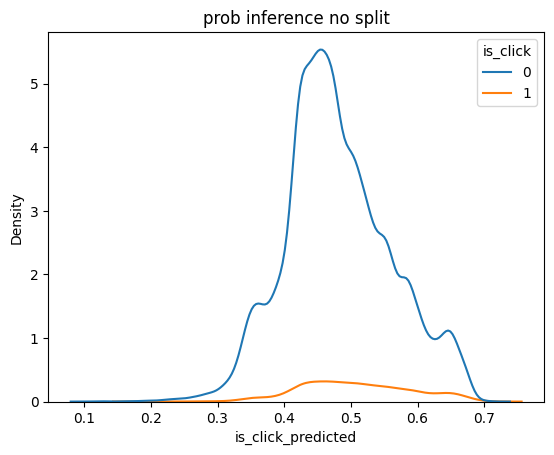

In [40]:
y_trues = [p_s_p_t.is_click, y_i.is_click, y_i.is_click]
y_scores = [p_s_p_t.is_click_predicted, p_s_p_i.is_click_predicted, p_ns_p_i.is_click_predicted]
results_labels = ["prob test train-test split",
                  "prob inference train-test split",
                  "prob inference no split"]

for y_true, y_score, label in zip(y_trues, y_scores, results_labels):
    sns.kdeplot(x=y_score, hue=y_true)
    plt.title(label)
    plt.show()

## Error analysis class predictions